<a href="https://colab.research.google.com/github/Eezzeldin/POC/blob/carrier_memory/Profit_ML_V5_run0ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
#pip install gplearn

In [146]:
#pip install tqdm

In [147]:
#pip install fitter

In [148]:
'''
from gplearn.genetic import SymbolicRegressor, SymbolicTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generating some synthetic data for demonstration
# For example, let's try to discover the relationship y = x^2 - x + 1
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the symbolic regressor
est_gp = SymbolicRegressor(population_size=5000,
                           generations=3, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0 ,n_jobs=-1)
est_gp.fit(X_train, y_train)

# Making predictions
y_pred = est_gp.predict(X_test)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
'''


'\nfrom gplearn.genetic import SymbolicRegressor, SymbolicTransformer\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\n# Generating some synthetic data for demonstration\n# For example, let\'s try to discover the relationship y = x^2 - x + 1\nX = np.linspace(-1, 1, 100).reshape(-1, 1)\ny = X**2 - X + 1 + np.random.randn(*X.shape) * 0.1\n\n# Splitting data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Creating and training the symbolic regressor\nest_gp = SymbolicRegressor(population_size=5000,\n                           generations=3, stopping_criteria=0.01,\n                           p_crossover=0.7, p_subtree_mutation=0.1,\n                           p_hoist_mutation=0.05, p_point_mutation=0.1,\n                           max_samples=0.9, verbose=1,\n                           parsimony_coefficient=0.01, random_state=0 ,n_job

In [149]:
import pandas as pd
import numpy as np

import random

from gplearn.genetic import SymbolicRegressor, SymbolicTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

In [150]:
'''
+The reason an MMC  has the Profit it does is :
- price, TIV decay
- R2 TIV , R2 Price

- Confidence measure : number of points.

- Year of Release (candidate for removal)

+missing from analysis :
TIV Launch price

+grouping variable    : Launch Price Bins.
+granularity variable : MMC
'''

'\n+The reason an MMC  has the Profit it does is :\n- price, TIV decay\n- R2 TIV , R2 Price\n\n- Confidence measure : number of points.\n\n- Year of Release (candidate for removal)\n\n+missing from analysis :\nTIV Launch price\n\n+grouping variable    : Launch Price Bins.\n+granularity variable : MMC\n'

In [151]:
input_file_path    = "/content/profit_pred_3.csv"

col_rename_dict = {
    "Launch Price (bin)"   : "LPB" ,
    'Avg. Launch Price'    : "LP"  ,
    "Avg. Launch TIV"      : "LTIV",
    "Model Memory Carrier" : "MMC" ,
    "Year of Release Date" : "Year",
    "Avg. Point Count 1000": "PC"  ,
    "Avg. Price decay"     : "Price_Decay",
    "Avg. Price rsquared"  : "Price_R2"  ,
    "Avg. TIV decay"       : "TIV_Decay" ,
    "Avg. TIV rsquared"    : "TIV_R2",
}
memory_name            = "M"
carrier_name           = "C"
carriers               = ['Verizon', 'Unlocked', 'AT&T', 'T-Mobile', 'Sprint']
carrier_replace_dict   = {}
for i,z in enumerate (carriers) : carrier_replace_dict [z] = i
online_features        = [carrier_name , memory_name ]
not_Features           = ["Profit" , "MMC" ,"PC"]
Target                 = "Profit"
pred_col_name          = "Profit_Pred"

scaler_dict            = {}
interaction_1_name     = "Price_Decay_R2"
interaction_1_terms    = ["Price_R2" , "Price_Decay"]

grouping_col           = "LPB" # .astype("category")

number_of_test_per_fold = 1
fold_y_pred             = "fold_y_pred"
fold_test_index         = "fold_test_index"
fold_num                = 'fold_num'
fold_y_g_pred           = "fold_y_g_pred"

interaction       = True
one_hot           = True
scale_features    = True
drop_grouping_var = True
Kfold_symbolic    = True

cuttof_col_name       = "PC"
PC_cut_off            = True
cuttoff_threshold     = 20


#winner
generations=100
population_size=4000
hall_of_fame=200
n_components=10

#winner
generations=200 # * 2
population_size=8000 # * 2
hall_of_fame=100
n_components = 30
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005

#winner
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005


#competitor
generations=10 # * 2
population_size=800 # * 2
hall_of_fame = 200
n_components = 50
function_set_trans = ['add', 'sub', 'mul', 'div',
'sqrt', 'log', 'abs', 'neg', 'inv',
'max', 'min']
parsimony_coefficient_trans = 0.0005



In [152]:
data_input  = pd.read_csv (input_file_path)
data_input.head ()

,Launch Price (bin),Model Memory Carrier,Year of Release Date,Avg. Launch Price,Avg. Launch TIV,Avg. Point Count 1000,Avg. Price decay,Avg. Price rsquared,Avg. TIV decay,Avg. TIV rsquared,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [153]:
data_input.shape

(114, 11)

In [154]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Launch Price (bin)     114 non-null    int64  
 1   Model Memory Carrier   114 non-null    object 
 2   Year of Release Date   114 non-null    int64  
 3   Avg. Launch Price      114 non-null    float64
 4   Avg. Launch TIV        114 non-null    float64
 5   Avg. Point Count 1000  114 non-null    int64  
 6   Avg. Price decay       114 non-null    float64
 7   Avg. Price rsquared    114 non-null    float64
 8   Avg. TIV decay         114 non-null    float64
 9   Avg. TIV rsquared      114 non-null    float64
 10  Profit                 114 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 9.9+ KB


In [155]:
data_input.columns

Index(['Launch Price (bin)', 'Model Memory Carrier', 'Year of Release Date',
       'Avg. Launch Price', 'Avg. Launch TIV', 'Avg. Point Count 1000',
       'Avg. Price decay', 'Avg. Price rsquared', 'Avg. TIV decay',
       'Avg. TIV rsquared', 'Profit'],
      dtype='object')

In [156]:
data_input.rename (col_rename_dict,axis =1 ,inplace=True)
data_input.head()

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737


In [157]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

In [158]:
if PC_cut_off :
   c = data_input [cuttof_col_name] >= cuttoff_threshold
   data_input = data_input [c]

In [159]:
data_input.MMC.apply (lambda x : x.split ("_") [-1] ).unique()

array(['Unlocked', 'Verizon', 'AT&T', 'T-Mobile', 'Sprint'], dtype=object)

In [160]:
data_input [carrier_name] = data_input.MMC.apply (lambda x : x.split ("_") [-1] )
data_input.head ()

<ipython-input-160-e131f89e60be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_input [carrier_name] = data_input.MMC.apply (lambda x : x.split ("_") [-1] )


,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,C
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,Unlocked
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,Unlocked
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,Verizon
5,900,iPhone X_256GB_Unlocked,2017,973.07,508.062,20,-0.001065,0.963357,-0.001140,0.923691,1523024,Unlocked
6,800,iPhone XS_512GB_Unlocked,2018,890.93,525.731,20,-0.001198,0.925255,-0.001412,0.943464,35351,Unlocked


<Axes: xlabel='C', ylabel='Profit'>

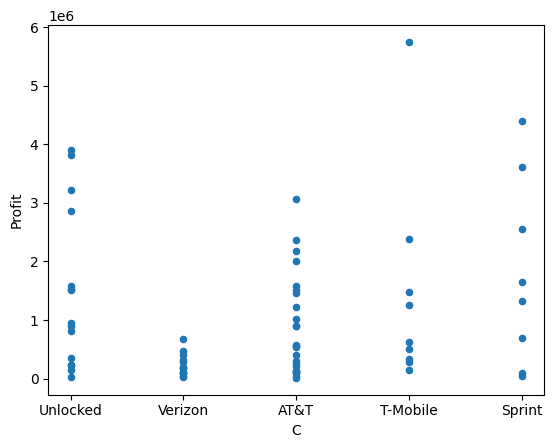

In [161]:
data_input.plot.scatter ("C" , "Profit")

In [162]:
data_input.MMC.apply (lambda x : int ( x.split ("_") [-2].split ("GB") [0] ) )

1      512
2      256
4      256
5      256
6      512
      ... 
105    256
106     64
107     64
108     64
111     32
Name: MMC, Length: 70, dtype: int64

In [163]:
data_input [memory_name] = data_input.MMC.apply (lambda x : int (x.split ("_") [-2].split ("GB") [0]) )
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,C,M
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,Unlocked,512
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,Unlocked,256
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,Verizon,256
5,900,iPhone X_256GB_Unlocked,2017,973.07,508.062,20,-0.001065,0.963357,-0.001140,0.923691,1523024,Unlocked,256
6,800,iPhone XS_512GB_Unlocked,2018,890.93,525.731,20,-0.001198,0.925255,-0.001412,0.943464,35351,Unlocked,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,400,iPhone 8_256GB_AT&T,2017,495.28,262.468,20,-0.001037,0.939066,-0.001051,0.808873,105084,AT&T,256
106,400,iPhone 8_64GB_T-Mobile,2017,426.33,207.186,21,-0.001106,0.924510,-0.001027,0.844116,620795,T-Mobile,64
107,400,iPhone 8_64GB_Sprint,2017,416.73,209.840,21,-0.001077,0.923211,-0.001004,0.850054,1317866,Sprint,64
108,400,iPhone 8_64GB_AT&T,2017,433.44,232.722,21,-0.001094,0.937447,-0.001141,0.852472,890989,AT&T,64


<Axes: xlabel='M', ylabel='Profit'>

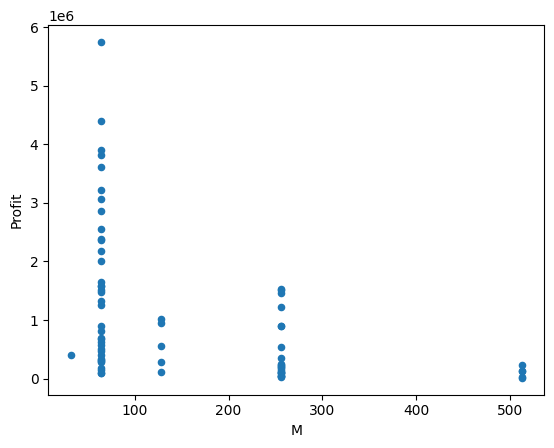

In [164]:
data_input.plot.scatter ("M" , "Profit")

In [165]:
if PC_cut_off :
   c = data_input [cuttof_col_name] >= cuttoff_threshold
   data_input = data_input [c]

In [166]:
data_input [grouping_col] = data_input [grouping_col].astype("category")

In [167]:
#data_input [interaction_1_name] = data_input [interaction_1_terms [0]]  * data_input [interaction_1_terms [1]]

In [168]:
X = data_input.drop (not_Features , axis=1)
y =  data_input [Target]

In [169]:
X.head ( )

,LPB,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,C,M
1,1000,2018,1014.39,634.388,-0.001009,0.911918,-0.001326,0.918513,Unlocked,512
2,1000,2018,1008.15,602.997,-0.001031,0.915380,-0.001333,0.932912,Unlocked,256
4,900,2018,982.38,562.836,-0.001070,0.891031,-0.001114,0.860168,Verizon,256
5,900,2017,973.07,508.062,-0.001065,0.963357,-0.001140,0.923691,Unlocked,256
6,800,2018,890.93,525.731,-0.001198,0.925255,-0.001412,0.943464,Unlocked,512


In [170]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 111
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          70 non-null     category
 1   Year         70 non-null     int64   
 2   LP           70 non-null     float64 
 3   LTIV         70 non-null     float64 
 4   Price_Decay  70 non-null     float64 
 5   Price_R2     70 non-null     float64 
 6   TIV_Decay    70 non-null     float64 
 7   TIV_R2       70 non-null     float64 
 8   C            70 non-null     object  
 9   M            70 non-null     int64   
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 5.9+ KB


In [171]:
test_size      = int  (X.shape [0] * 0.3)

test_indicies  = X.sample (test_size).index.values
train_indicies = [i for i in X.index if i not in test_indicies]

X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [172]:
y_train

2      1514777
5      1523024
6        35351
8       351604
9       122394
13      315383
14     3220899
16      903583
20      131109
21      179596
23     1229447
24       11238
26      222485
28      804002
29      502454
30     1644980
34     1579163
39      279454
41      894328
44      151424
47      148986
49      944712
50     3604646
51       92765
52      330826
57     1509835
59      223817
61      542611
62      409495
63     3822921
75     3899236
76       25719
78       88093
80      276864
84       45706
85      188370
88     1258660
89     4392323
90     2373526
98     2375994
99     2548821
100    2011503
101     678468
102    5747639
103     693369
104    3065411
105     105084
106     620795
107    1317866
Name: Profit, dtype: int64

2024-03-26 19:02:19.836 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-26 19:02:19.884 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-26 19:02:19.896 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-26 19:02:20.030 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-26 19:02:20.107 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,4.318820e-12,3310.742572,3316.418033,inf,0.099500,0.679895
gamma,4.735960e-12,3402.658696,3408.334157,inf,0.158078,0.154955
beta,5.367824e-12,3216.833267,3224.400548,inf,0.153351,0.179700
expon,5.721459e-12,3283.460238,3287.243878,inf,0.159778,0.146750
norm,9.986405e-12,3316.972935,3320.756576,inf,0.188457,0.053607


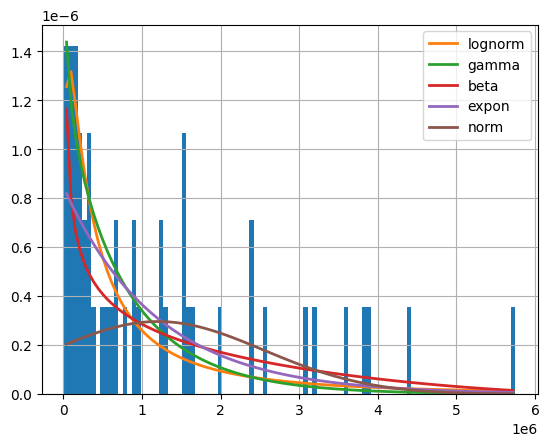

In [173]:
from fitter import Fitter
import numpy as np

# Assuming 'y' is your target variable, which is a NumPy array or a list of your data points
#y = np.random.normal(loc=0, scale=1, size=1000)  # Example data

# Create a Fitter instance with your data
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'] )  # Specify distributions you want to test

# Fit the distributions to your data and find the best fit
f.fit()
# This will fit all the distributions you've listed (or all available distributions if you don't specify) to your data

# Display the summary of the best fitting distributions
f.summary()


In [174]:
import scipy
from scipy.stats import *  # Import all distributions

# Fit the distributions and find the best
f = Fitter(y_train.values, distributions=['gamma', 'lognorm', 'norm', 'expon', 'beta'])
f.fit()
best_fit_name, best_fit_params = list(f.get_best(method='sumsquare_error').items())[0]
print (best_fit_name)
print (best_fit_params )
# Use the best fitting distribution's parameters to calculate the PDF values for y
# Check the name of the best fitting distribution and dynamically call the scipy.stats function
dist = getattr(scipy.stats, best_fit_name)  # Dynamically get the distribution class
pdf_values_y = dist.pdf(y_train, **best_fit_params)  # Calculate PDF values using the best fit parameters


2024-03-26 19:02:20.729 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.0)
2024-03-26 19:02:20.747 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.0)
2024-03-26 19:02:20.804 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)
2024-03-26 19:02:20.849 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.0)
2024-03-26 19:02:20.950 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.0)


lognorm
{'s': 1.4013418663040031, 'loc': -7549.044715007316, 'scale': 565553.7378700653}


In [175]:
pdf_values_y.shape

(49,)

In [176]:
pd.DataFrame (pdf_values_y).describe()

,0
count,4.900000e+01
mean,5.630537e-07
std,4.722927e-07
min,1.256344e-08
25%,1.368322e-07
50%,4.110627e-07
75%,1.007141e-06
max,1.331889e-06


array([[<Axes: title={'center': '0'}>]], dtype=object)

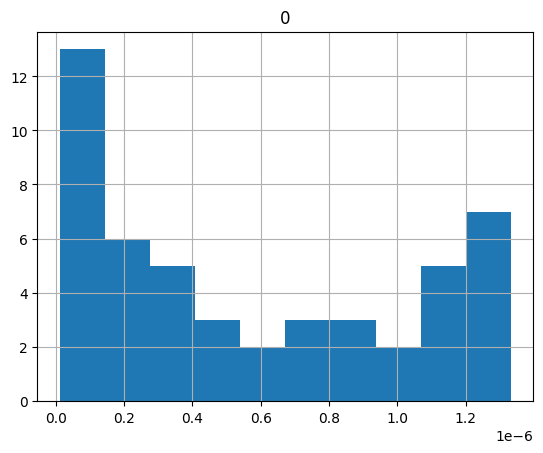

In [177]:
pd.DataFrame (pdf_values_y).hist()

In [178]:
scaler_dict  [Target] = MinMaxScaler().fit (y_train.values.reshape (-1,1))
y_train_scaled        = scaler_dict  [Target].transform (y_train.values.reshape (-1,1))
y_train_scaled        = y_train_scaled + 0.000000001

In [179]:
scaler_dict  [Target].inverse_transform (y_train_scaled )

array([[1514777.0057364],
       [1523024.0057364],
       [  35351.0057364],
       [ 351604.0057364],
       [ 122394.0057364],
       [ 315383.0057364],
       [3220899.0057364],
       [ 903583.0057364],
       [ 131109.0057364],
       [ 179596.0057364],
       [1229447.0057364],
       [  11238.0057364],
       [ 222485.0057364],
       [ 804002.0057364],
       [ 502454.0057364],
       [1644980.0057364],
       [1579163.0057364],
       [ 279454.0057364],
       [ 894328.0057364],
       [ 151424.0057364],
       [ 148986.0057364],
       [ 944712.0057364],
       [3604646.0057364],
       [  92765.0057364],
       [ 330826.0057364],
       [1509835.0057364],
       [ 223817.0057364],
       [ 542611.0057364],
       [ 409495.0057364],
       [3822921.0057364],
       [3899236.0057364],
       [  25719.0057364],
       [  88093.0057364],
       [ 276864.0057364],
       [  45706.0057364],
       [ 188370.0057364],
       [1258660.0057364],
       [4392323.0057364],
       [2373

In [180]:
pd.DataFrame (y_train_scaled).describe()

,0
count,4.900000e+01
mean,2.078032e-01
std,2.369371e-01
min,1.000000e-09
25%,3.087860e-02
50%,1.163151e-01
75%,2.733290e-01
max,1.000000e+00


array([[<Axes: title={'center': '0'}>]], dtype=object)

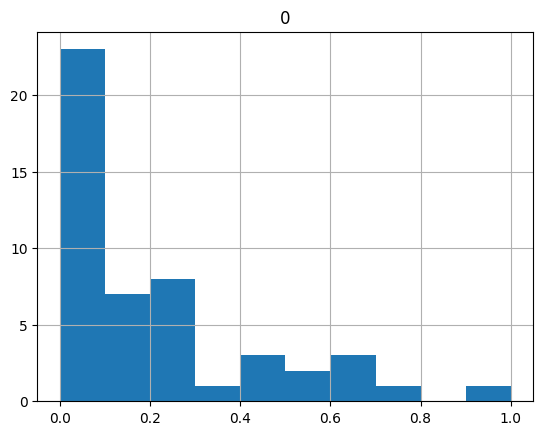

In [181]:
pd.DataFrame (y_train_scaled).hist()

In [182]:
y_train_scaled.shape

(49, 1)

In [183]:
X_train.shape

(49, 10)

In [184]:
X.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 111
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          70 non-null     category
 1   Year         70 non-null     int64   
 2   LP           70 non-null     float64 
 3   LTIV         70 non-null     float64 
 4   Price_Decay  70 non-null     float64 
 5   Price_R2     70 non-null     float64 
 6   TIV_Decay    70 non-null     float64 
 7   TIV_R2       70 non-null     float64 
 8   C            70 non-null     object  
 9   M            70 non-null     int64   
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 7.9+ KB


In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV , KFold, cross_val_predict , LeaveOneOut
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


#Setup for handling categorical and numerical features
categorical_features = [carrier_name]  # Example categorical feature
numerical_features   = X.drop(categorical_features , axis =1).columns.values.tolist()          # Add your numerical feature names here

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

symbolic_pipeline = Pipeline([
    ('symbolic_transform', SymbolicTransformer(generations=20, population_size=2000,
                                               hall_of_fame=49, n_components=10,
                                               function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                               parsimony_coefficient=0.0005, max_samples=0.9, verbose=0, n_jobs=-1))
])

# Combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform_pipeline", symbolic_pipeline),
])

# Full pipeline: preprocess categorical and numerical features, then apply combined features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', combined_features, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])



# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'preprocessor__num__poly_minmax__poly__degree': [randint (1,3).rvs() for _ in range (100)],
    'preprocessor__num__poly_minmax__poly__interaction_only' : [True,False],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size': [randint (50,100).rvs () for _ in range (100)],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations': [randint (5,30).rvs() for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [randint (5,30).rvs () for _ in range (100)],
    #'features__symbolic_transform__hall_of_fame': [i // 2 for i in param_distributions ['features__symbolic_transform__population_size']],
    'preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components': [randint (1,49).rvs () for _ in range (100)],
    #'regressor': np.random.choice ([LinearRegression()]),
    #'regressor__max_iter': [randint (100,10000).rvs () for _ in range (100)],
    'regressor__n_estimators': [randint (3000,5000).rvs () for _ in range (100)] ,
    'regressor__max_depth': randint(3, 10).rvs (size = 100),
    'regressor__max_features': loguniform(1e-2, 0.5).rvs (size = 100),
    #'regressor__final_estimator__alpha': loguniform(1e-2, 10).rvs (size = 100) ,
    #'regressor__mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],

}



cv     = 10
cv     = LeaveOneOut ()
cv     = 3
n_iter = 25
#neg_root_mean_squared_error
random_search = RandomizedSearchCV(pipeline, param_distributions=param_distributions,
                                   n_iter=n_iter, verbose=50,cv = cv , scoring = 'max_error' ,error_score='raise')

random_search.fit (X_train,y_train_scaled.ravel())
print (random_search.best_score_)
print (random_search.best_params_)

import pickle

# Save the pipeline
with open('/content/drive/MyDrive/Colab Notebooks/saved_pipeline_2.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3; 1/25] START preprocessor__num__poly_minmax__poly__degree=2, preprocessor__num__poly_minmax__poly__interaction_only=True, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations=16, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components=19, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size=83, regressor__max_depth=4, regressor__max_features=0.08683435973178058, regressor__n_estimators=4830
[CV 1/3; 1/25] END preprocessor__num__poly_minmax__poly__degree=2, preprocessor__num__poly_minmax__poly__interaction_only=True, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations=16, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components=19, preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size=83, regressor__max_depth=4, regressor__max_features=0.08683435973178058, 

In [186]:
random_search

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               FeatureUnion(transformer_list=[('poly_minmax',
                                                                                                               Pipeline(steps=[('poly',
                                                                                                                                PolynomialFeatures(include_bias=False)),
                                                                                                                               ('minmax_scaler',
                                                                                                                                MinMaxScaler())])),
                                                                                                              ('symbolic_transform_pipeline',
                                                                                                               Pipeline(steps=[('symbolic_transform',
                                                                                                                                SymbolicTr...
       0.14360453, 0.41116248, 0.01293121, 0.24266088, 0.46895983,
       0.02142159, 0.01204808, 0.04716659, 0.02001081, 0.19530417,
       0.08600627, 0.09422851, 0.02579036, 0.01171088, 0.05566515]),
                                        'regressor__n_estimators': [3125, 4595,
                                                                    4636, 4656,
                                                                    4344, 3624,
                                                                    3363, 3701,
                                                                    4256, 4610,
                                                                    3288, 3477,
                                                                    4330, 4745,
                                                                    4834, 3343,
                                                                    3149, 3750,
                                                                    4164, 4885,
                                                                    3671, 3567,
                                                                    3024, 3199,
                                                                    3458, 3179,
                                                                    3949, 3068,
                                                                    3856, 3086, ...]},
                   scoring='max_error', verbose=50)

In [187]:
 pd.DataFrame (random_search.cv_results_).sort_values("rank_test_score").head ()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_estimators,param_regressor__max_features,param_regressor__max_depth,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components,param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations,param_preprocessor__num__poly_minmax__poly__interaction_only,param_preprocessor__num__poly_minmax__poly__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,9.054775,0.636643,0.145767,0.004490,4519,0.29366,4,69,4,25,False,1,"{'regressor__n_estimators': 4519, 'regressor__...",-0.195185,-0.438480,-0.586467,-0.406711,0.161312,1
6,8.586925,0.485630,0.141646,0.001658,4433,0.178172,6,74,20,23,True,1,"{'regressor__n_estimators': 4433, 'regressor__...",-0.219365,-0.395579,-0.694615,-0.436519,0.196168,2
19,5.459610,0.367361,0.151973,0.045478,3458,0.243841,7,51,11,11,True,1,"{'regressor__n_estimators': 3458, 'regressor__...",-0.335118,-0.334518,-0.645945,-0.438527,0.146667,3
16,5.890686,0.594721,0.114405,0.002964,3458,0.062268,9,94,6,11,False,2,"{'regressor__n_estimators': 3458, 'regressor__...",-0.303852,-0.351140,-0.729278,-0.461423,0.190383,4
5,6.449981,0.720682,0.130781,0.006028,3713,0.143605,8,79,7,13,True,2,"{'regressor__n_estimators': 3713, 'regressor__...",-0.296515,-0.343876,-0.759318,-0.466570,0.207905,5


In [188]:
random_search.predict (X_train)

array([0.20957396, 0.20113804, 0.05898981, 0.04361432, 0.04483902,
       0.15217673, 0.42036726, 0.14048036, 0.03659148, 0.05148491,
       0.15990042, 0.02921293, 0.03597432, 0.20087409, 0.10283908,
       0.31772911, 0.29630148, 0.20256637, 0.11581552, 0.08076387,
       0.04238629, 0.16304049, 0.44281736, 0.11191402, 0.16195935,
       0.27462994, 0.12207889, 0.06498378, 0.11884242, 0.50367221,
       0.55358969, 0.04409361, 0.04577797, 0.08013867, 0.0578089 ,
       0.13153211, 0.31787523, 0.50842183, 0.24560316, 0.46102245,
       0.47384917, 0.39722241, 0.17531439, 0.77156976, 0.1851811 ,
       0.52649549, 0.05987377, 0.17119837, 0.25963165])

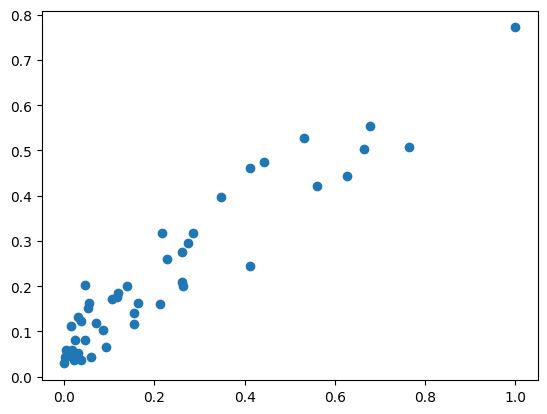

In [189]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
#y_val_pred = cross_val_predict(random_search, X_train,y_train_scaled.ravel(), cv=kf)
fig, ax = plt.subplots()

ax.scatter(y_train_scaled,random_search.predict (X_train))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [190]:
random_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  FeatureUnion(transformer_list=[('poly_minmax',
                                                                                  Pipeline(steps=[('poly',
                                                                                                   PolynomialFeatures(degree=1,
                                                                                                                      include_bias=False)),
                                                                                                  ('minmax_scaler',
                                                                                                   MinMaxScaler())])),
                                                                                 ('symbolic_transform_pipeline',
                                                                                  Pipeline(steps=[('symbolic_transform',
                                                                                                   SymbolicTransformer(function_set=('add',
                                                                                                                                     'sub',
                                                                                                                                     'mul',
                                                                                                                                     'di...
                                                                                                                       max_samples=0.9,
                                                                                                                       n_components=4,
                                                                                                                       n_jobs=-1,
                                                                                                                       parsimony_coefficient=0.0005,
                                                                                                                       population_size=69))]))]),
                                                  ['LPB', 'Year', 'LP', 'LTIV',
                                                   'Price_Decay', 'Price_R2',
                                                   'TIV_Decay', 'TIV_R2',
                                                   'M']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['C'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=4,
                                       max_features=0.2936601236749638,
                                       n_estimators=4519))])

In [47]:
random_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=24,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=49,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=67))])),
                ('regressor',
                 RandomForestRegressor(max_depth=6,
                                       max_features=0.0310890323724676,
                                       n_estimators=4991))])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   59.2s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


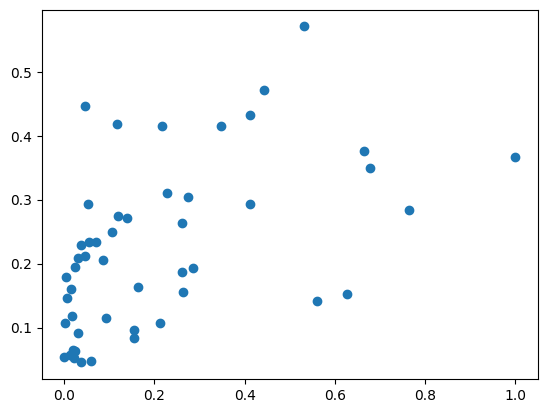

In [191]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
#LOO = LeaveOneOut (verbose = 50)
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(),
                               cv=kf,
                               verbose=50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  1

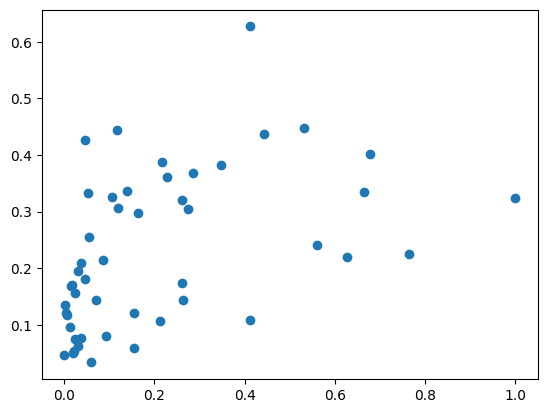

In [192]:
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(random_search.best_estimator_,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [222]:
import pickle

# Save the pipeline
with open('saved_pipeline.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)


In [223]:

# Load the pipeline
with open('saved_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [224]:
loaded_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

In [225]:
from sklearn.base import BaseEstimator, TransformerMixin, clone
clone (loaded_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('poly_minmax',
                                                 Pipeline(steps=[('poly',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False,
                                                                                     interaction_only=True)),
                                                                 ('minmax_scaler',
                                                                  MinMaxScaler())])),
                                                ('symbolic_transform',
                                                 SymbolicTransformer(function_set=('add',
                                                                                   'sub',
                                                                                   'mul',
                                                                                   'div',
                                                                                   'sqrt',
                                                                                   'log',
                                                                                   'abs',
                                                                                   'neg',
                                                                                   'inv',
                                                                                   'max',
                                                                                   'min'),
                                                                     generations=8,
                                                                     hall_of_fame=50,
                                                                     max_samples=0.9,
                                                                     n_components=21,
                                                                     n_jobs=-1,
                                                                     parsimony_coefficient=0.0005,
                                                                     population_size=83))])),
                ('regressor', RandomForestRegressor(n_estimators=4772))])

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin, clone


rs          = clone (random_search.best_estimator_)
regressors  = [rs,rs, rs]
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cv_strategy = LeaveOneOut ()
X_augmented = X_train.copy()
for regressor in regressors[:-1]:  # Exclude the last regressor for now
    # Generate cross-validated predictions
    predictions = cross_val_predict(regressor, X_augmented, y_train_scaled.ravel()
    , cv=cv_strategy , n_jobs = -1 , verbose = 50 )
    # Augment features with predictions
    X_augmented = np.hstack([X_augmented, predictions.reshape(-1, 1)])


final_regressor = regressors[-1].fit(X_augmented,y_train_scaled.ravel())


LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(final_regressor ,
                               X_augmented,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1,
                               )

'''

# Define base regressors
base_regressors = [
    ('lr', random_search.best_estimator_),
    ('dt', random_search.best_estimator_),
    ('svr', random_search.best_estimator_)
]

# Define the stacking ensemble model
stacked_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=random_search.best_estimator_
)

np.column_stack([
    cross_val_predict(regressor, X_train, y_train, cv=kf) for regressor in base_regressors
])

LOO = LeaveOneOut ()
y_val_pred = cross_val_predict(stacked_regressor ,
                               X_train,y_train_scaled.ravel(), cv=LOO ,
                               verbose = 50,
                               n_jobs = -1)

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()
'''

fig, ax = plt.subplots()

ax.scatter(y_train_scaled,y_val_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2

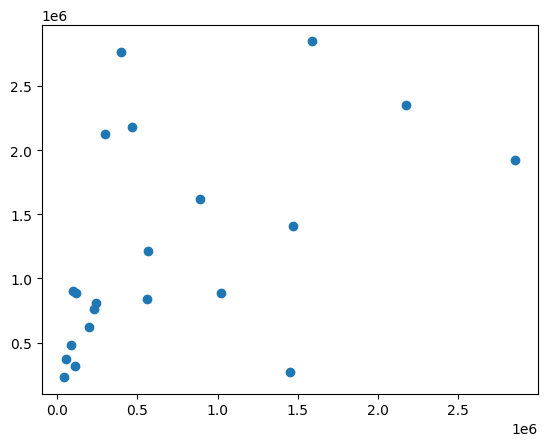

In [193]:
fig, ax = plt.subplots()

ax.scatter(y_test, scaler_dict  [Target].inverse_transform (random_search.predict (X_test).reshape (-1,1) ))
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

reg_cv.score (X_cv,y_cv) 0.5451231222556372
reg_cv.intercept [0.98111184]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

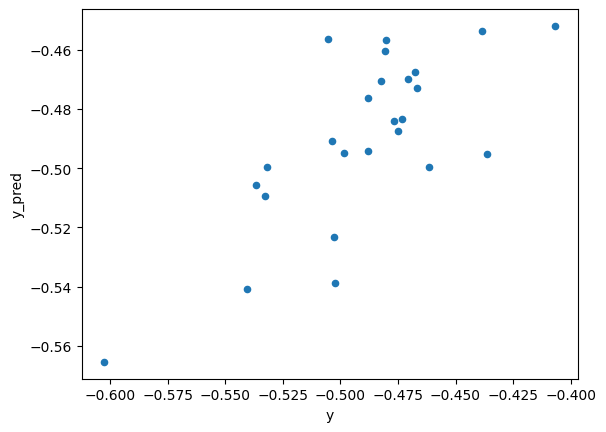

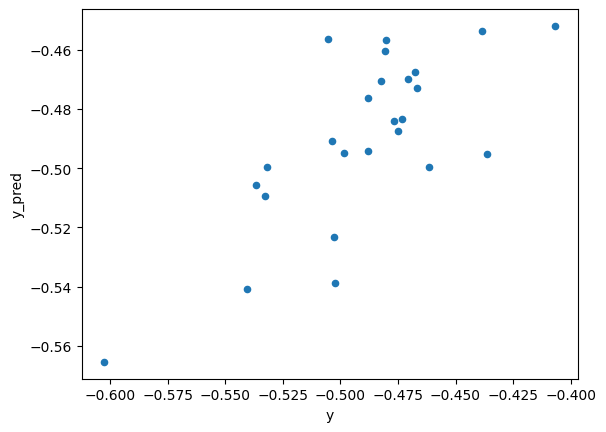

In [194]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_test_score" ] #"mean_fit_time"  , mean_test_score  , "rank_test_score"
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]
cv_df = cv_df.dropna()

X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df ["y"]         = y_cv
cv_df ["y_pred"]    = y_cv_scaler.inverse_transform (y_pred_cv)


cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

cv_df.plot.scatter ("y" , "y_pred" )

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [ ]:
reg_cv.coef_.tolist() [0]

[0.0,
 2.7755575615628914e-17,
 -0.5014728523807777,
 0.057719700390672694,
 0.40535959163023444,
 0.0980174896610439,
 0.17608309928270427]

In [195]:
for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]):
  print ('param_col_list' , col ,coef)
  print ()
#Rank

param_col_list param_preprocessor__num__poly_minmax__poly__degree -0.008768442500280905

param_col_list param_preprocessor__num__poly_minmax__poly__interaction_only 0.07487483072858159

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size -0.1265676236330427

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations -0.16176290728418916

param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components -0.505617285710084

param_col_list param_regressor__n_estimators -0.00047330231044155624

param_col_list param_regressor__max_depth -0.2607084870050699

param_col_list param_regressor__max_features -0.03463228956539388



<Axes: >

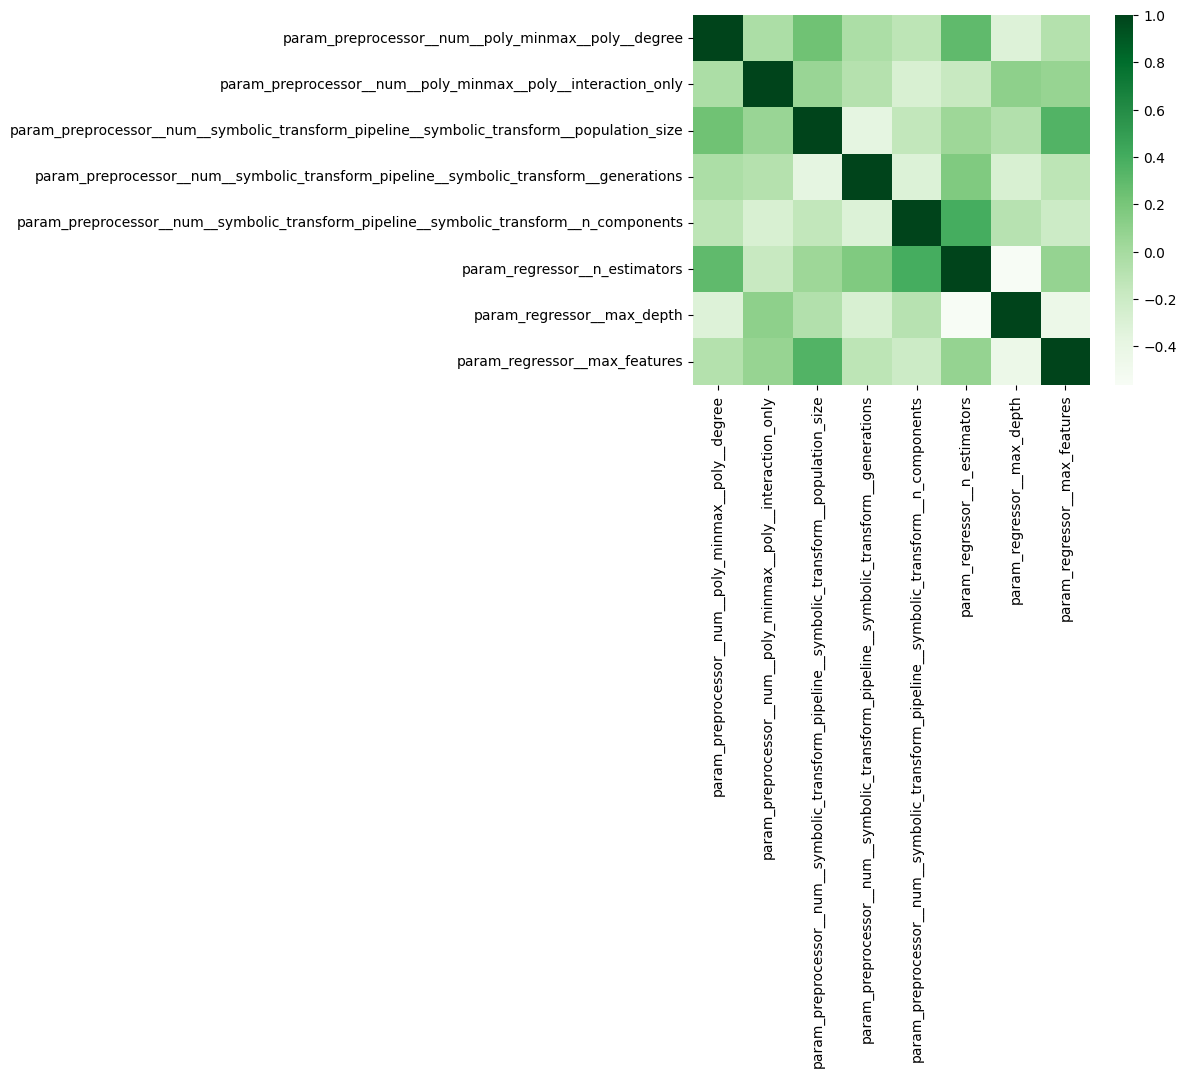

In [196]:
import seaborn as sns

df = pd.DataFrame (X_cv_scaled , columns = X_cv.columns)

sns.heatmap(df.corr(),cmap='Greens',annot=False)


reg_cv.score (X_cv,y_cv) 0.9627056722551968
param_col_list param_preprocessor__num__poly_minmax__poly__degree 0.04069565576694082
param_col_list param_preprocessor__num__poly_minmax__poly__interaction_only -0.045593324867795326
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__population_size 0.24935256963549998
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__generations 0.7427232230079474
param_col_list param_preprocessor__num__symbolic_transform_pipeline__symbolic_transform__n_components 0.10650143206359178
param_col_list param_regressor__n_estimators 0.5959683690114878
param_col_list param_regressor__max_depth -0.04129229417168662
param_col_list param_regressor__max_features 0.11113490643487443
reg_cv.intercept [-0.2436435]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

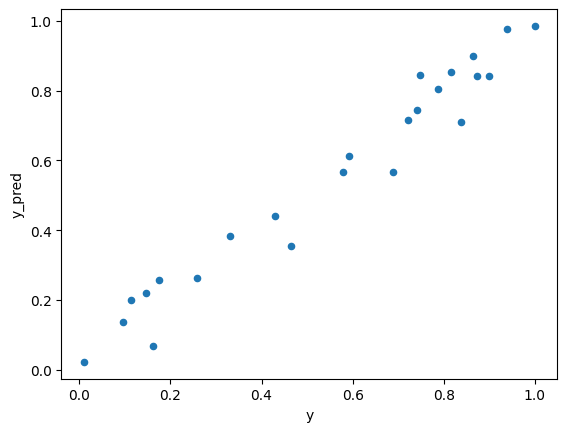

In [197]:
param_col_list  = ["param_" +i for i in list (param_distributions.keys()) ]
performance_list = ["mean_fit_time" ] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_.tolist() [0]): print ('param_col_list' ,col  ,coef)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

reg_cv.score (X_cv,y_cv) 0.0005713543611566285
param_col_list Index(['mean_fit_time'], dtype='object') reg_cv.coef_ [[0.02224467]]
reg_cv.intercept [0.48819034]


'\ndata_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *\n            (data_input [fold_y_g_pred ] > data_input [Target].min() )\n             ].plot.scatter (Target , fold_y_g_pred )\n'

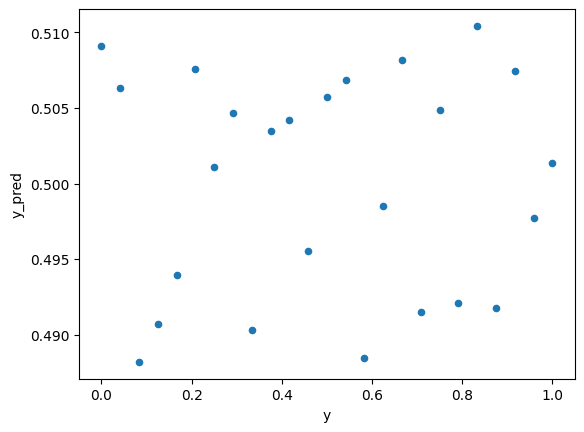

In [198]:
param_col_list  = []
performance_list = ["mean_fit_time" , "rank_test_score"] #""
cv_cols = np.concatenate ([param_col_list ,  performance_list ]).tolist()

cv_df = pd.DataFrame (random_search.cv_results_) [cv_cols]


X_cv = cv_df.iloc [:,:-1]
y_cv = cv_df.iloc [:,-1]

X_cv_scaler = MinMaxScaler ()
y_cv_scaler = MinMaxScaler ()

X_cv_scaled = X_cv_scaler.fit_transform (X_cv)
y_cv_scaled = y_cv_scaler.fit_transform (y_cv.values.reshape (-1,1))


reg_cv = LinearRegression ()
reg_cv.fit (X_cv_scaled , y_cv_scaled)

y_pred_cv = reg_cv.predict (X_cv_scaled)

print ('reg_cv.score (X_cv,y_cv)' , reg_cv.score (X_cv_scaled,y_cv_scaled))


cv_df ["y"]         = y_cv_scaled
cv_df ["y_pred"]    = y_pred_cv

cv_df [(cv_df ["y_pred" ] < cv_df ["y"].max() ) *
            (cv_df ["y_pred" ] > cv_df ["y"].min() )
             ].plot.scatter ("y" , "y_pred" )

for col,coef in zip (X_cv.columns , reg_cv.coef_): print ('param_col_list' ,X_cv.columns  , "reg_cv.coef_",reg_cv.coef_)

print ("reg_cv.intercept",reg_cv.intercept_)


'''
fig, ax = plt.subplots()

ax.scatter(y_cv,y_pred_cv)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

print ("reg_cv.coef_",reg_cv.coef_)
'''

'''
data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
'''

In [ ]:
from scipy.stats import randint
randint(10, 200).rvs()

59

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from gplearn.genetic import SymbolicTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from tqdm import tqdm
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold




# Define the polynomial features followed by MinMax scaling part of the pipeline
poly_minmax_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('minmax_scaler', MinMaxScaler())
])

# FeatureUnion to combine PolynomialFeatures + MinMaxScaler and SymbolicTransformer
combined_features = FeatureUnion([
    ("poly_minmax", poly_minmax_pipeline),
    ("symbolic_transform", SymbolicTransformer(generations=20, population_size=2000,
                                                 hall_of_fame=100, n_components=10,
                                                 function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min'),
                                                 parsimony_coefficient=0.0005, max_samples=0.9, verbose=0,n_jobs=-1)),
])

'''
# Final pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('linear_regression', LinearRegression())
])
'''

# Define a placeholder pipeline with a generic 'regressor' step
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('features', combined_features),
    ('regressor', LinearRegression())  # Placeholder, will be replaced by RandomizedSearchCV
])


# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'features__poly_minmax__poly__degree': randint (1,3),
    'features__symbolic_transform__population_size': randint (1000,10000),
    'features__symbolic_transform__generations': randint (1,5),
    'features__symbolic_transform__n_components': randint (1,10),
    #'regressor': np.random.choice ([LinearRegression()]),
    'regressor__fit_intercept': [True, False],
}

# Number of iterations for randomized search
n_iter = 100

# Prepare for cross-validation
cv = KFold(n_splits=2, shuffle=True, random_state=42)

# Sample parameters and track progress with tqdm
best_score  = -10000000000
best_params = None
params_list = []
scores_list = []

for _ in tqdm(range(n_iter), desc='Randomized Search Progress'):
    # Sample a set of parameters
    #sampled_params = {param: dist.rvs() for param, dist in param_distributions.items()}
    sampled_params = {param: dist.rvs() if hasattr(dist, 'rvs') else random.choice(dist) for param, dist in param_distributions.items()}
    params_list.append (sampled_params)

    # Set model parameters
    pipeline.set_params(**sampled_params)

    # Evaluate the model using cross-validation
    scores = cross_val_score(pipeline, X_train, y_train_scaled.ravel(), cv=cv,n_jobs=-1)
    mean_score = np.mean(scores)
    scores_list.append (mean_score)

    # Update best score and parameters if current model is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = sampled_params

# Display the best parameters and score
print(f"Best Score: {best_score}")
print(f"Best Parameters: {best_params}")



Randomized Search Progress:  17%|█▋        | 17/100 [07:27<36:23, 26.31s/it]


KeyboardInterrupt: 

In [ ]:
y_pred = pipeline.predict (X_test)

array([  591439.08229131,   752530.9228889 , -2685583.91928316,
         -15949.37247386,  1386020.36586994,  2072085.01477079,
        -582067.61219902,   958334.72112473,  -282400.49041108,
        -100129.63709688,  -850413.03179482,  1756504.74515103,
         728158.70727665,   164461.59477663,   121538.97280892,
         495743.64308018,  1559183.32853212,   689948.69526136,
         452811.9186288 ,  -445194.60458677, -1264937.35765752,
         553769.69960764,  2570068.84127389,  1299666.55151188,
         831721.32820484,   627386.86654907,   502997.28455903,
         620596.42004627,   440017.92440524,  1102738.32040988,
       -1741952.23913559,   263106.96055655,    46857.16924342,
         992946.46955271])

In [ ]:
pipeline.score (X_test , y_test)

-0.1292929381334582

In [ ]:
import random

poly_scaler_dict = {}
poly           = PolynomialFeatures(3,interaction_only=True)
poly_fit       = poly.fit (X_train)

interaction_df = pd.DataFrame ( poly_fit.transform(X) )
interaction_df_rename_dict = {}
for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
sel_col_indicies        = list ( set ( [ random.randint (0,int (interaction_df.shape [1] * 0.3) - X.shape [1] ) for _ in range (int (interaction_df.shape [1] * 1))] ) )
print (interaction_df.shape)
interaction_df  = interaction_df.T.drop_duplicates().T
print (max (sel_col_indicies) , interaction_df.shape [1] , sel_col_indicies  )
interaction_df = interaction_df.iloc [:,sel_col_indicies]
print (interaction_df.shape)

interaction_df_train = interaction_df.loc [train_indicies]
for col in interaction_df.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      poly_scaler_dict [col] = MinMaxScaler().fit (interaction_df_train [col].values.reshape (-1,1))
  except :
    continue
print (poly_scaler_dict)
for col in interaction_df.columns :
    if col in poly_scaler_dict.keys() :
      interaction_df [col]                      =  poly_scaler_dict [col].transform (interaction_df [col].values.reshape (-1,1))

(114, 93)
19 93 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
(114, 20)
{'0_poly': MinMaxScaler(), '1_poly': MinMaxScaler(), '2_poly': MinMaxScaler(), '3_poly': MinMaxScaler(), '4_poly': MinMaxScaler(), '5_poly': MinMaxScaler(), '6_poly': MinMaxScaler(), '7_poly': MinMaxScaler(), '8_poly': MinMaxScaler(), '9_poly': MinMaxScaler(), '10_poly': MinMaxScaler(), '11_poly': MinMaxScaler(), '12_poly': MinMaxScaler(), '13_poly': MinMaxScaler(), '14_poly': MinMaxScaler(), '15_poly': MinMaxScaler(), '16_poly': MinMaxScaler(), '17_poly': MinMaxScaler(), '18_poly': MinMaxScaler(), '19_poly': MinMaxScaler()}


In [ ]:
for col in X.columns :
  try :
    #c1 = type (X [col])   == type (X ["PC"])
    #c2 = type (X [col])   == type (X ["Price_Decay"])
    #c  = c1 | c2
    #if c:
    #if col != grouping_col :
      scaler_dict [col] = StandardScaler().fit (X_train [col].values.reshape (-1,1))
  except :
    continue
print (scaler_dict)

scaler_dict  [Target] = StandardScaler().fit (y_train.values.reshape (-1,1))

print (scaler_dict)

#print ( col , scaler_dict [col].transform (X [col].values.reshape (-1,1)) )
if scale_features :
  for col in X.columns :
    if col in scaler_dict.keys() :
      X [col]                      =  scaler_dict [col].transform (X [col].values.reshape (-1,1))
  y                                =  scaler_dict [Target].transform (y.values.reshape (-1,1))
  y = pd.Series ( y.reshape (-1) )

{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler()}
{'LPB': StandardScaler(), 'Year': StandardScaler(), 'LP': StandardScaler(), 'LTIV': StandardScaler(), 'Price_Decay': StandardScaler(), 'Price_R2': StandardScaler(), 'TIV_Decay': StandardScaler(), 'TIV_R2': StandardScaler(), 'Profit': StandardScaler()}


In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
one_hot_df = pd.get_dummies (X [grouping_col])
one_hot_df_rename_dict = {}
for col in one_hot_df.columns : one_hot_df_rename_dict [col] = str (col) + "_"
one_hot_df.rename (one_hot_df_rename_dict,axis =1, inplace=True)
one_hot_df

,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,0.015432172268942524_,0.6327190630266435_,1.2500059537843444_,1.8672928445420454_,2.4845797352997465_
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
109,0,1,0,0,0,0,0,0
110,0,1,0,0,0,0,0,0
111,0,1,0,0,0,0,0,0
112,0,1,0,0,0,0,0,0


In [ ]:
if one_hot :
   X = X.join (one_hot_df)

In [ ]:
if drop_grouping_var :  X = X.drop (grouping_col,axis =1 )

In [ ]:
interaction_df.shape

(114, 20)

In [ ]:
if interaction :
   X = X.join (interaction_df)
   X_train       = X.loc [train_indicies]
   X_test        = X.loc [test_indicies]
   y_train       = y.loc [train_indicies]
   y_test        = y.loc [test_indicies]
#X.join (one_hot_df).join (interaction_df)

In [ ]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [ ]:
y

0     -0.701497
1     -0.517761
2      0.753245
3     -0.617494
4     -0.545146
         ...   
109   -0.732612
110   -0.659082
111   -0.349535
112    0.074627
113   -0.334164
Length: 114, dtype: float64

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict (X)

In [ ]:
reg.coef_

array([ 2.73383674e+12, -2.88829297e+03,  1.15732361e+03,  1.32613830e+03,
        1.18942547e+03, -1.63428872e-01,  6.54385196e-01, -2.62267323e+03,
       -1.87358076e+03, -1.12421378e+03, -3.75528017e+02,  3.74260004e+02,
        1.12408070e+03,  1.87357244e+03,  2.62406597e+03,  2.28881836e-05,
        4.49696490e+03, -8.24282791e+12, -7.92043093e+02,  2.95525821e+02,
        3.26527109e+02,  2.33796271e+02, -4.34473199e-02,  1.34718547e-01,
       -9.75288089e+03,  7.12793248e-01, -4.91178718e+00,  1.68126213e+01,
        1.84642934e+01, -5.96497042e-01, -5.83194044e+00,  1.13393401e+04,
       -4.82842934e+03, -5.70895901e+03, -6.27202304e+03])

In [ ]:
reg.score (X,y)

0.274201005390999

In [ ]:
if scale_features :
  data_input [pred_col_name] = scaler_dict [Target].inverse_transform (y_pred.reshape (-1,1)).reshape (-1)
else :
  data_input [pred_col_name] = y_pred

In [ ]:
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-1.237176e+06
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,7.706661e+05
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,7.988550e+05
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,3.072800e+05
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,9.314316e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,7.207173e+05
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,4.506972e+05
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,-3.158433e+05
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,6.480196e+05


In [ ]:
data_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LPB          114 non-null    category
 1   MMC          114 non-null    object  
 2   Year         114 non-null    int64   
 3   LP           114 non-null    float64 
 4   LTIV         114 non-null    float64 
 5   PC           114 non-null    int64   
 6   Price_Decay  114 non-null    float64 
 7   Price_R2     114 non-null    float64 
 8   TIV_Decay    114 non-null    float64 
 9   TIV_R2       114 non-null    float64 
 10  Profit       114 non-null    int64   
 11  Profit_Pred  114 non-null    float64 
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 10.4+ KB


In [ ]:
#data_input.plot.scatter ("Profit" , "Profit_Pred")

NameError: name 'y_pred' is not defined

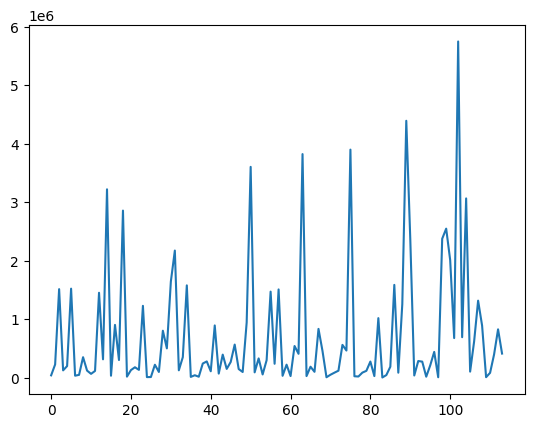

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="red")
plt.show()

In [ ]:
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-1.8364285000041605_,-1.2191416092464593_,-0.6018547184887585_,...,10_poly,11_poly,12_poly,13_poly,14_poly,15_poly,16_poly,17_poly,18_poly,19_poly
0,0.402015,2.297781,2.688829,-1.120221,0.282477,-0.981968,-0.036201,0,0,0,...,1.016719,1.039782,0.026091,0.915334,0.046034,0.919357,1.024281,1.052487,0.194698,0.825415
1,0.402015,2.209180,2.483232,-0.312389,0.471802,-0.944999,0.487788,0,0,0,...,1.000000,1.000000,0.202922,0.938239,0.053888,0.978101,1.000000,1.000000,0.393950,0.862726
2,0.402015,2.172224,2.195472,-0.409148,0.509785,-0.973679,0.683121,0,0,0,...,0.993026,0.944320,0.181742,0.942834,0.047795,1.000000,0.989872,0.926537,0.370084,0.870211
3,-0.603023,2.191353,2.188808,-1.239414,0.982307,-1.198642,0.178327,0,0,0,...,0.996636,0.943030,0.000000,1.000000,0.000000,0.943408,0.994301,0.924137,0.165954,0.962304
4,0.402015,2.019600,1.827317,-0.583918,0.242639,-0.062761,-0.303703,0,0,0,...,0.854438,0.773250,0.246404,0.792245,0.339378,0.758548,0.948046,0.832550,0.326977,0.817564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.608061,-1.291558,-1.150069,-0.847848,0.824229,-0.886313,0.529760,0,1,0,...,0.055568,0.043637,0.737888,0.229038,0.759654,0.141830,0.039952,0.071897,0.263093,0.930156
110,-1.608061,-1.370919,-1.144899,-0.721838,0.446227,-0.959629,0.588296,0,1,0,...,0.049578,0.044037,0.748921,0.210746,0.753424,0.144455,0.018225,0.073215,0.294142,0.855736
111,-1.608061,-1.288478,-1.216915,-1.427868,0.664495,-1.300016,0.378991,0,1,0,...,0.055801,0.038463,0.687103,0.221308,0.724497,0.135069,0.040795,0.054848,0.120173,0.898708
112,-1.608061,-1.207636,-1.198590,0.292577,-0.025033,0.168419,0.685359,0,1,0,...,0.061903,0.039881,0.837742,0.187941,0.849288,0.148808,0.062928,0.059522,0.544099,0.762957


In [ ]:

#population_size=4000 , generations=100 , hall_of_fame=200 , n_components=10
gp = SymbolicTransformer(generations=generations, population_size=population_size,
hall_of_fame=hall_of_fame, n_components=n_components,
function_set=function_set_trans,
parsimony_coefficient=parsimony_coefficient_trans,
max_samples=0.9, verbose=1,
random_state=0, n_jobs=-1)

gp.fit(X_train, y_train)

gp_features = gp.transform(X)

gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

X = X.join (gp_features_df)
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

reg    = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)




print ( 'reg.score (X,y)'            , reg.score (X,y))
print ('reg.score (X_train,y_train)' , reg.score (X_train,y_train))
print ('reg.score (X_test,y_test)'   , reg.score (X_test,y_test))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.49        0.0814154       39         0.348858         0.125686     17.09s
   1    12.72          0.15788       20         0.387531         0.104589      6.37s
   2    13.38         0.187806       33         0.447514          0.16327      5.61s
   3    15.12         0.201719       20         0.496535         0.626991      5.82s
   4    24.12         0.219704       20         0.534471         0.301336      4.62s
   5    32.14         0.247597       56         0.548805         0.819797      7.13s
   6    37.79         0.284561       69         0.616783         0.225604      4.98s
   7    35.40         0.340355       53         0.642962        0.0231784      2.28s
   8    41.69         0.372287       80         0.678511         0.669253  

In [ ]:
X = X.drop (gp_features_df,axis=1)
gp_features = gp.transform(X)
#new_diabetes = np.hstack((diabetes.data, gp_features))

In [ ]:
gp_features

array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [ 6.33671200e-01,  3.24361579e-02, -4.63520973e-02, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [ 1.36130263e+01, -1.90726409e-01,  1.29236043e-01, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features.shape

(114, 50)

In [ ]:
np.hstack((X.values, gp_features))

array([[ 3.28564370e-01,  2.34596186e+00,  2.74680808e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.25190746e+00,  2.53291180e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 3.28564370e-01,  2.21267622e+00,  2.23353521e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       ...,
       [-1.64282185e+00, -1.46104072e+00, -1.31660130e+00, ...,
         1.16854450e-01, -3.68781250e-01, -6.46539509e+09],
       [-1.64282185e+00, -1.37522237e+00, -1.29753680e+00, ...,
         2.64621619e-01, -4.58797534e-01,  5.72579590e+10],
       [-1.64282185e+00, -1.61922311e+00, -1.27239721e+00, ...,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [ ]:
gp_features_df = pd.DataFrame (gp_features)
gp_features_rename_dict = {}
for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)
gp_features_df

,0_,1_,2_,3_,4_,5_,6_,7_,8_,9_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.005451,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.001406,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000859,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.003237,-0.000000,0.000000,-0.000000,0.000000,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2.580641,0.032252,-0.048726,-3616.301567,31.170070,-5072.459452,-2.184131,0.013713,-13192.186709,0.358851,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,0.731506,-0.025702,0.036232,2104.708103,54.497773,4056.056077,-0.669802,-0.010937,12119.460198,-0.168633,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,0.633671,0.032436,-0.046352,-3076.216264,39.019246,-6091.381937,-0.442521,0.009417,-11653.415635,0.526852,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,13.613026,-0.190726,0.129236,9966.864519,73.666329,10885.320336,-12.780124,-0.050808,41371.048432,-1.571688,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [ ]:

#X = X.drop (gp_features_df,axis=1)

X = X.join (gp_features_df)
X

,Year,LP,LTIV,Price_Decay,Price_R2,TIV_Decay,TIV_R2,-2.0235481185165343_,-1.3773730890742797_,-0.7311980596320249_,...,40_,41_,42_,43_,44_,45_,46_,47_,48_,49_
0,0.328564,2.345962,2.746808,-1.063660,0.254197,-1.007627,0.142488,0,0,0,...,0.000000,-0.000000,-0.000000,5.450686,0.535502,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
1,0.328564,2.251907,2.532912,-0.279537,0.451914,-0.972083,0.538486,0,0,0,...,0.000000,-0.000000,-0.000000,1.405797,0.244633,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
2,0.328564,2.212676,2.233535,-0.373456,0.491581,-0.999657,0.686106,0,0,0,...,0.000000,-0.000000,-0.000000,0.859032,0.155889,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
3,-0.657129,2.232983,2.226602,-1.179355,0.985050,-1.215951,0.304615,0,0,0,...,0.000000,-0.000000,-0.000000,3.237149,0.471407,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
4,0.328564,2.050659,1.850519,-0.543097,0.212593,-0.123845,-0.059673,0,0,0,...,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.642822,-1.464310,-1.247057,-0.799281,0.819965,-0.915658,0.570206,0,1,0,...,0.009172,-0.048726,0.017776,-61112.249672,192.154318,276.894949,-11.504173,0.102855,-0.397141,-2.830884e+10
110,-1.642822,-1.548557,-1.241678,-0.676969,0.425206,-0.986149,0.614444,0,1,0,...,-0.007784,0.036232,0.003260,-7107.671363,-65.800995,-206.831756,-25.250262,0.176545,-0.452283,1.180708e+10
111,-1.642822,-1.461041,-1.316601,-1.362277,0.653149,-1.313418,0.456264,0,1,0,...,0.007826,-0.046352,0.002352,-7640.736132,66.766107,267.710815,-14.354730,0.116854,-0.368781,-6.465395e+09
112,-1.642822,-1.375222,-1.297537,0.307674,-0.066945,0.098426,0.687798,0,1,0,...,-0.023536,0.129236,0.039029,-109015.750263,-252.652608,-713.334202,-29.277572,0.264622,-0.458798,5.725796e+10


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict (X)

In [ ]:
reg.score (X,y)

-9.000463985718417

In [ ]:
X_train       = X.loc [train_indicies]
X_test        = X.loc [test_indicies]
y_train       = y.loc [train_indicies]
y_test        = y.loc [test_indicies]

In [ ]:
reg.score (X_train,y_train)

0.9505300237791671

In [ ]:
reg.score (X_test,y_test)

-27.16903559731706

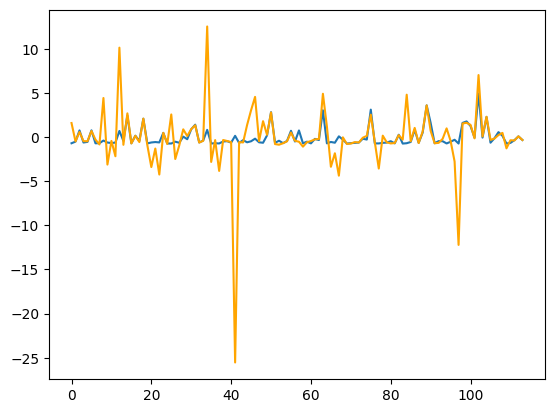

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred ,color ="orange")
plt.show()

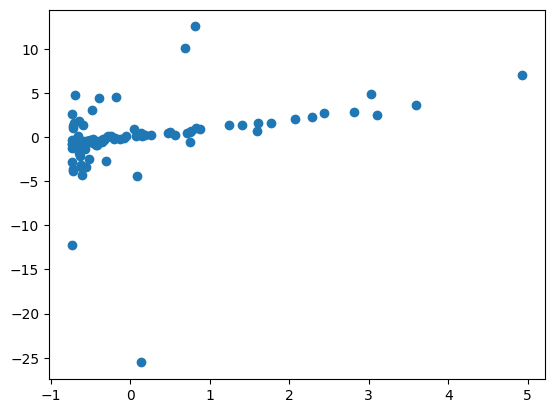

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

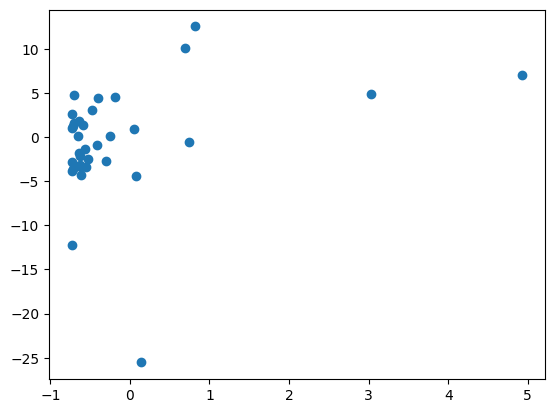

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y.loc [test_indicies],pd.Series (y_pred).loc[test_indicies])
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
# Creating and training the symbolic regressor
#parsimony_coefficient=0.0001 ,  generations=50
function_set = ['add', 'sub', 'mul', 'div' , 'sqrt', 'log', 'abs', 'neg', 'inv']
est_gp = SymbolicRegressor(population_size=10000,
                           generations=5, stopping_criteria=0.1,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           function_set=function_set,
                           parsimony_coefficient=0.00000000000001, random_state=0,n_jobs=-1)
est_gp.fit(X, y)



    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.38      1.77874e+22        4          0.53947          0.85718     25.04s
   1     6.60      5.36263e+17       29          0.49823          1.30843     27.55s
   2     6.94      1.54325e+12        2         0.505548          1.71147     20.42s
   3     7.59      5.56695e+11       10         0.474133          1.35068      8.46s
   4     8.50      1.08291e+12        4         0.454699          1.57774      0.00s


SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv'],
                  generations=5, max_samples=0.9, n_jobs=-1, p_crossover=0.7,
                  p_hoist_mutation=0.1, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=1e-14,
                  population_size=10000, random_state=0, stopping_criteria=0.1,
                  verbose=1)

In [ ]:
# Making predictions
y_pred_g = est_gp.predict(X)

# Evaluating the model
print("Model expression:", est_gp._program)
print("Mean Squared Error:", mean_squared_error(y, y_pred_g))


Model expression: sub(X59, abs(0.402))
Mean Squared Error: 1.102181748859987


In [ ]:
est_gp.score(X,y)

-0.10218174885998699

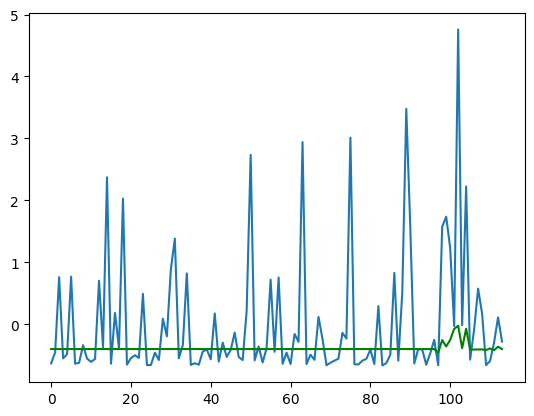

In [ ]:
fig, ax = plt.subplots()

ax.plot([i for i in range (y.shape [0]) ], y)
ax.plot([i for i in range (y.shape [0]) ], y_pred_g ,color ="green")
plt.show()

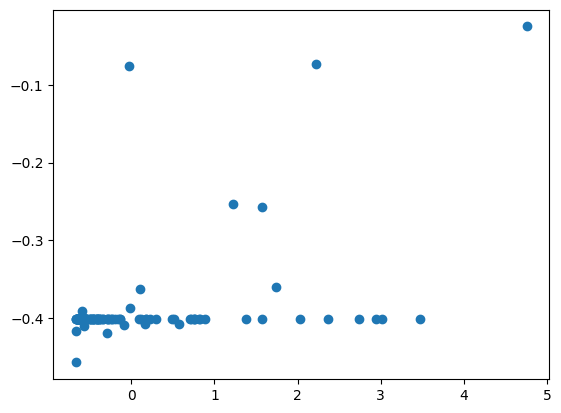

In [ ]:
fig, ax = plt.subplots()

ax.scatter(y,y_pred_g)
#ax.plot([i for i in range (y.shape [0]) ],  ,color ="green")
plt.show()

In [ ]:
X.shape [0] // number_of_test_per_fold

114

In [ ]:
kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

fold_number     = 0

kfold_pred_dict = {fold_test_index :np.array([])  ,
                   fold_y_pred     : np.array ([]) ,
                   }

kfold_pred_list = []
model_NN = MLPRegressor(
    hidden_layer_sizes=(250, 200, 100, 100,100),  # More layers and different numbers of neurons
    activation='tanh',  # Different activation function
    solver='sgd',  # Different optimizer
    learning_rate_init=0.01,  # Initial learning rate
    learning_rate='adaptive',  # Adaptive learning rate
    max_iter=1000,  # More iterations
    batch_size=64,  # Smaller batch size
    alpha=0.0001,  # L2 regularization
    early_stopping=True,  # Enable early stopping
    n_iter_no_change=20,  # Patience for early stopping
    random_state=0
)

for i, (train_index, test_index) in enumerate(kf.split(X)):
      print(f"Fold {i}:")
      print(f"  Train: index={train_index}")
      print(f"  Test:  index={test_index}")

      X_train_fold  = X.loc [train_index]
      X_test_fold   = X.loc [test_index]

      y_train_fold  = y.loc [train_index]
      y_test_fold   = y.loc [test_index]

      reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
      #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

      fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

      kfold_pred_dict [fold_test_index] =  test_index
      kfold_pred_dict [fold_y_pred]     =  fold_y_pred_value.reshape (-1)
      kfold_pred_dict [fold_num ]       =  i

      kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))


      print ( kfold_pred_dict)

kfold_pred_df = pd.concat (kfold_pred_list)


Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 107 108
 109 110 111 112 113]
  Test:  index=[106]
{'fold_test_index': array([106]), 'fold_y_pred': array([-7.93155962e+08]), 'fold_num': 0}
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  

In [ ]:
data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)
data_input

,LPB,MMC,Year,LP,LTIV,PC,Price_Decay,Price_R2,TIV_Decay,TIV_R2,Profit,Profit_Pred,fold_y_pred,fold_num
0,1000,iPhone XS Max_512GB_Verizon,2018,1029.35,656.816,19,-0.001192,0.894662,-0.001335,0.879887,41381,-531899.697988,-2.291341e+06,9
1,1000,iPhone XS Max_512GB_Unlocked,2018,1014.39,634.388,20,-0.001009,0.911918,-0.001326,0.918513,227473,790518.041632,9.519541e+05,92
2,1000,iPhone XS Max_256GB_Unlocked,2018,1008.15,602.997,20,-0.001031,0.915380,-0.001333,0.932912,1514777,736038.014269,2.593205e+05,109
3,1000,iPhone X_256GB_Verizon,2017,1011.38,602.270,19,-0.001220,0.958448,-0.001388,0.895701,126462,915436.593137,-6.221203e+05,48
4,900,iPhone XS Max_256GB_Verizon,2018,982.38,562.836,20,-0.001070,0.891031,-0.001114,0.860168,199737,-786018.700838,6.485786e+06,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,400,iPhone 7_256GB_T-Mobile,2016,423.30,238.041,17,-0.001130,0.944040,-0.001312,0.921607,9867,535338.497667,-9.084934e+09,35
110,400,iPhone 7_128GB_T-Mobile,2016,409.90,238.605,19,-0.001102,0.909587,-0.001330,0.925922,84340,427041.757517,-4.666813e+09,4
111,400,iPhone 7_32GB_AT&T,2016,423.82,230.749,20,-0.001262,0.929481,-0.001412,0.910493,397857,481107.547500,9.407326e+09,70
112,400,iPhone 7 Plus_32GB_T-Mobile,2016,437.47,232.748,19,-0.000871,0.866634,-0.001058,0.933077,827457,676207.107730,7.003193e+09,51


In [ ]:
kfold_pred_df.shape

(114, 3)

In [ ]:
kfold_pred_df [fold_test_index].duplicated().sum ()

0

<Axes: xlabel='Profit', ylabel='fold_y_pred'>

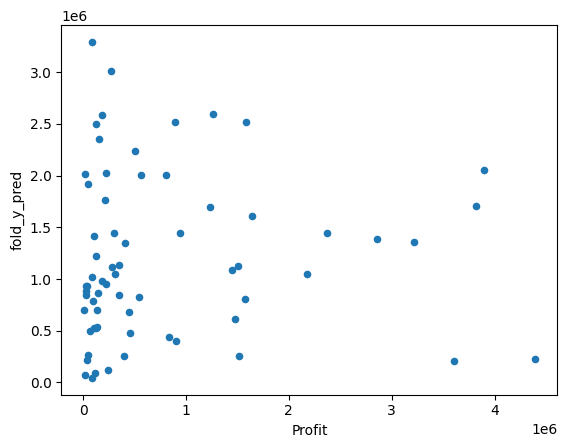

In [ ]:
data_input [(data_input [fold_y_pred] < data_input [Target].max() ) *
            (data_input [fold_y_pred] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_pred)

         Year        LP      LTIV  Price_Decay  Price_R2  TIV_Decay    TIV_R2
0    0.328564  2.345962  2.746808    -1.063660  0.254197  -1.007627  0.142488
1    0.328564  2.251907  2.532912    -0.279537  0.451914  -0.972083  0.538486
2    0.328564  2.212676  2.233535    -0.373456  0.491581  -0.999657  0.686106
3   -0.657129  2.232983  2.226602    -1.179355  0.985050  -1.215951  0.304615
4    0.328564  2.050659  1.850519    -0.543097  0.212593  -0.123845 -0.059673
..        ...       ...       ...          ...       ...        ...       ...
109 -1.642822 -1.464310 -1.247057    -0.799281  0.819965  -0.915658  0.570206
110 -1.642822 -1.548557 -1.241678    -0.676969  0.425206  -0.986149  0.614444
111 -1.642822 -1.461041 -1.316601    -1.362277  0.653149  -1.313418  0.456264
112 -1.642822 -1.375222 -1.297537     0.307674 -0.066945   0.098426  0.687798
113 -1.642822 -1.619223 -1.272397    -1.355946  0.602780  -1.676351  0.532734

[114 rows x 7 columns]
Fold 0:
  Train: index=[  0   1   2   3 

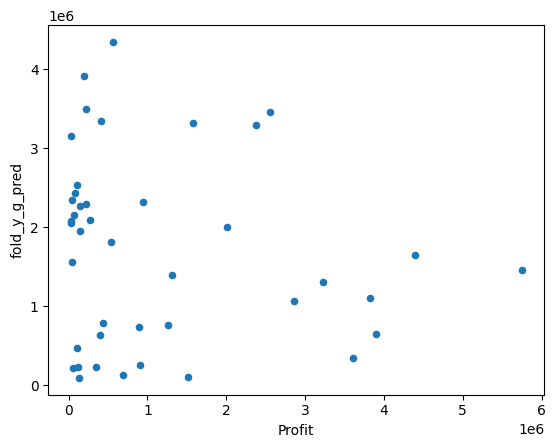

In [ ]:

if Kfold_symbolic :
    kf              = KFold(n_splits=X.shape [0] // number_of_test_per_fold , shuffle= True )

    fold_number     = 0

    kfold_pred_dict = {fold_test_index :np.array([])  ,
                      fold_y_g_pred      : np.array ([]) ,
                      }

    kfold_pred_list = []


    for i, (train_index, test_index) in enumerate(kf.split(X)):
          if gp_features_df.columns [0] in X.columns :
            X = X.drop (gp_features_df,axis =1)
          if interaction_df.columns [0] in X.columns :
            X = X.drop (interaction_df,axis =1)
          print (X)
          print(f"Fold {i}:")
          print(f"  Train: index={train_index}")
          print(f"  Test:  index={test_index}")

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          gp = SymbolicTransformer(generations=generations, population_size=population_size,
          hall_of_fame=hall_of_fame, n_components=n_components,
          function_set=function_set_trans,
          parsimony_coefficient=parsimony_coefficient_trans,
          max_samples=0.9, verbose=1,
          random_state=0, n_jobs=-1)

          gp.fit(X_train_fold, y_train_fold)

          gp_features = gp.transform(X)

          gp_features_df = pd.DataFrame (gp_features)
          gp_features_rename_dict = {}
          for col in gp_features_df.columns : gp_features_rename_dict [col] = str (col) + "_"
          gp_features_df.rename (gp_features_rename_dict  , axis =1 ,inplace=True)

          X = X.join (gp_features_df)

          poly           = PolynomialFeatures(2,interaction_only=False)
          interaction_df = pd.DataFrame ( poly.fit_transform(X) )
          interaction_df_rename_dict = {}
          for col in interaction_df.columns : interaction_df_rename_dict [col] = str (col) + "_poly"
          interaction_df.rename (interaction_df_rename_dict,axis =1, inplace=True)
          sel_col_indicies        = [ random.randint (0, interaction_df.shape [1]-X.shape [1] -1) for _ in range (int (interaction_df.shape [1] * 0.01))]
          print (interaction_df.shape)
          interaction_df  = interaction_df.T.drop_duplicates().T
          interaction_df  = interaction_df.iloc [:,sel_col_indicies]

          X = X.join (interaction_df)

          X_train_fold  = X.loc [train_index]
          X_test_fold   = X.loc [test_index]

          y_train_fold  = y.loc [train_index]
          y_test_fold   = y.loc [test_index]

          reg_fold = LinearRegression().fit(X_train_fold, y_train_fold)
          #reg_fold = est_gp.fit(X_train_fold, y_train_fold)
          #reg_fold = model_NN.fit(X_train_fold, y_train_fold)

          fold_y_pred_value = scaler_dict [Target].inverse_transform (reg_fold.predict (X_test_fold).reshape (-1,1))

          kfold_pred_dict [fold_test_index]   =  test_index
          kfold_pred_dict [fold_y_g_pred]     =  fold_y_pred_value.reshape (-1)
          kfold_pred_dict [fold_num ]         =  i

          kfold_pred_list.append (pd.DataFrame ( kfold_pred_dict))



          print ( kfold_pred_dict)

    kfold_pred_df = pd.concat (kfold_pred_list)

    data_input = data_input.merge (kfold_pred_df.set_index (fold_test_index) , how = "left" , left_index = True , right_index = True)

    data_input [(data_input [fold_y_g_pred ] < data_input [Target].max() ) *
            (data_input [fold_y_g_pred ] > data_input [Target].min() )
             ].plot.scatter (Target , fold_y_g_pred )
